In [1]:


import numpy as np 
import pandas as pd


In [2]:
data=pd.read_csv(r"C:\Users\hp\NLP\Reviews.csv")
data.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [3]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [4]:
data.shape

(568454, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
len(data.columns)

10

In [7]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
data.tail(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po..."
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A..."
568446,568447,B001EO7N10,A2P9W8T7NTLG2Z,Andy,0,0,2,1328918400,Mixed wrong,I had ordered some of these a few months back ...
568447,568448,B001EO7N10,APWCOAVILK94B,"Real Named Person ""wowzee""",0,0,5,1322524800,"If its all natural, this is like panacea of Sp...","Hoping there is no MSG in this, this tastes ex..."
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


Missing Value Handling

In [9]:
data.isna()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
568449,False,False,False,False,False,False,False,False,False,False
568450,False,False,False,False,False,False,False,False,False,False
568451,False,False,False,False,False,False,False,False,False,False
568452,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

<Axes: >

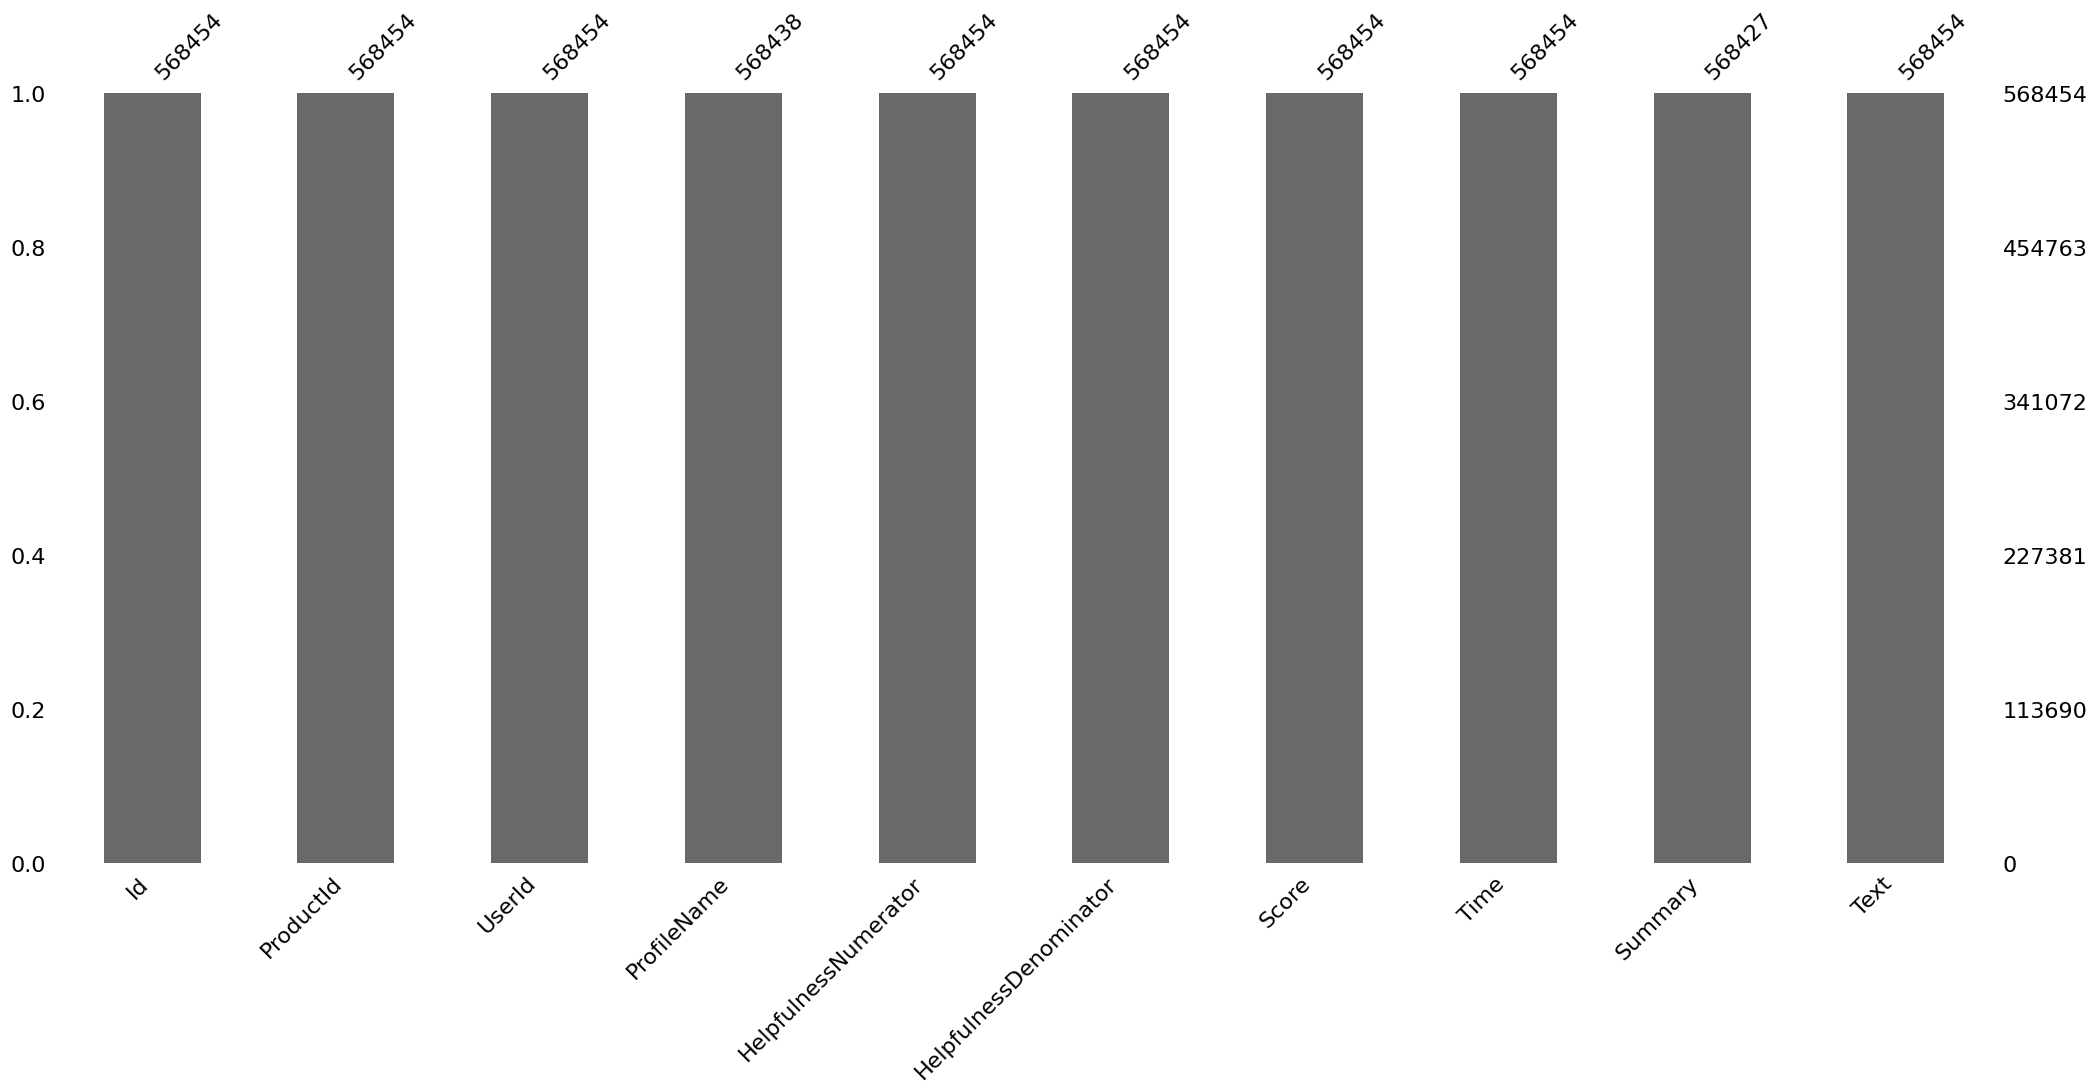

In [11]:
import missingno as msno
#visualize missing values using msno.matrix
msno.bar(data) 

In [12]:
data.dropna(axis=0,inplace=True)

In [13]:
data.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

Duplicate Values Handling

In [14]:
data.duplicated().sum()

0

In [15]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Sentimental Analysis

Important Metrics:
>Helpfulness Numerator
>Helpfulness Denominator
>Text Review
>Score

In [32]:
azdata=data[[ 'HelpfulnessNumerator','HelpfulnessDenominator','Summary', 'Text','Score']]
azdata

,HelpfulnessNumerator,HelpfulnessDenominator,Summary,Text,Score
0,1,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,5
1,0,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,1,1,"""Delight"" says it all",This is a confection that has been around a fe...,4
3,3,3,Cough Medicine,If you are looking for the secret ingredient i...,2
4,0,0,Great taffy,Great taffy at a great price. There was a wid...,5
...,...,...,...,...,...
568449,0,0,Will not do without,Great for sesame chicken..this is a good if no...,5
568450,0,0,disappointed,I'm disappointed with the flavor. The chocolat...,2
568451,2,2,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",5
568452,1,1,Favorite Training and reward treat,These are the BEST treats for training and rew...,5


In [35]:
azdata['Summary'].str.split() 

0                       [Good, Quality, Dog, Food]
1                            [Not, as, Advertised]
2                       ["Delight", says, it, all]
3                                [Cough, Medicine]
4                                   [Great, taffy]
                            ...                   
568449                    [Will, not, do, without]
568450                              [disappointed]
568451               [Perfect, for, our, maltipoo]
568452    [Favorite, Training, and, reward, treat]
568453                              [Great, Honey]
Name: Summary, Length: 568411, dtype: object

In [36]:
azdata['Text'].str.split()

0         [I, have, bought, several, of, the, Vitality, ...
1         [Product, arrived, labeled, as, Jumbo, Salted,...
2         [This, is, a, confection, that, has, been, aro...
3         [If, you, are, looking, for, the, secret, ingr...
4         [Great, taffy, at, a, great, price., There, wa...
                                ...                        
568449    [Great, for, sesame, chicken..this, is, a, goo...
568450    [I'm, disappointed, with, the, flavor., The, c...
568451    [These, stars, are, small,, so, you, can, give...
568452    [These, are, the, BEST, treats, for, training,...
568453    [I, am, very, satisfied, ,product, is, as, adv...
Name: Text, Length: 568411, dtype: object

In [34]:
azdata

,HelpfulnessNumerator,HelpfulnessDenominator,Summary,Text,Score,TextReview
0,1,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,5,"[Good, Quality, Dog, Food, I, have, bought, se..."
1,0,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1,"[Not, as, Advertised, Product, arrived, labele..."
2,1,1,"""Delight"" says it all",This is a confection that has been around a fe...,4,"[""Delight"", says, it, all, This, is, a, confec..."
3,3,3,Cough Medicine,If you are looking for the secret ingredient i...,2,"[Cough, Medicine, If, you, are, looking, for, ..."
4,0,0,Great taffy,Great taffy at a great price. There was a wid...,5,"[Great, taffy, Great, taffy, at, a, great, pri..."
...,...,...,...,...,...,...
568449,0,0,Will not do without,Great for sesame chicken..this is a good if no...,5,"[Will, not, do, without, Great, for, sesame, c..."
568450,0,0,disappointed,I'm disappointed with the flavor. The chocolat...,2,"[disappointed, I'm, disappointed, with, the, f..."
568451,2,2,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",5,"[Perfect, for, our, maltipoo, These, stars, ar..."
568452,1,1,Favorite Training and reward treat,These are the BEST treats for training and rew...,5,"[Favorite, Training, and, reward, treat, These..."


In [17]:
#Creating a new variable X_train
X_train=azdata

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568411 non-null  int64 
 1   ProductId               568411 non-null  object
 2   UserId                  568411 non-null  object
 3   ProfileName             568411 non-null  object
 4   HelpfulnessNumerator    568411 non-null  int64 
 5   HelpfulnessDenominator  568411 non-null  int64 
 6   Time                    568411 non-null  int64 
 7   Summary                 568411 non-null  object
 8   Text                    568411 non-null  object
 9   Score                   568411 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [19]:
X_train.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Time,Score
count,568411.000000,568411.000000,568411.000000,5.684110e+05,568411.000000
mean,284227.440964,1.743874,2.227876,1.296261e+09,4.183309
std,164099.020907,7.636781,8.288752,4.803792e+07,1.310368
min,1.000000,0.000000,0.000000,9.393408e+08,1.000000
25%,142114.500000,0.000000,0.000000,1.271290e+09,4.000000
50%,284224.000000,0.000000,1.000000,1.311120e+09,5.000000
75%,426341.500000,2.000000,2.000000,1.332720e+09,5.000000
max,568454.000000,866.000000,923.000000,1.351210e+09,5.000000


In [20]:
X_train.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,5
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,4
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,5


In [21]:
#Features with 1 constant
!pip install fast_ml
from fast_ml.utilities import reduce_memory_usage, display_all
from fast_ml.feature_selection import get_constant_features
constant_features =get_constant_features(X_train)
constant_features.head(10)

'pip' is not recognized as an internal or external command,
operable program or batch file.


,Desc,Var,Value,Perc


In [22]:
#Features with quasi-constant values
constant_features =get_constant_features(X_train, threshold= 0.99,dropna=False)
constant_features.head(10)

,Desc,Var,Value,Perc


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\AppData\Local\Temp\ipykernel_12540\1944523875.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr())


<Axes: >

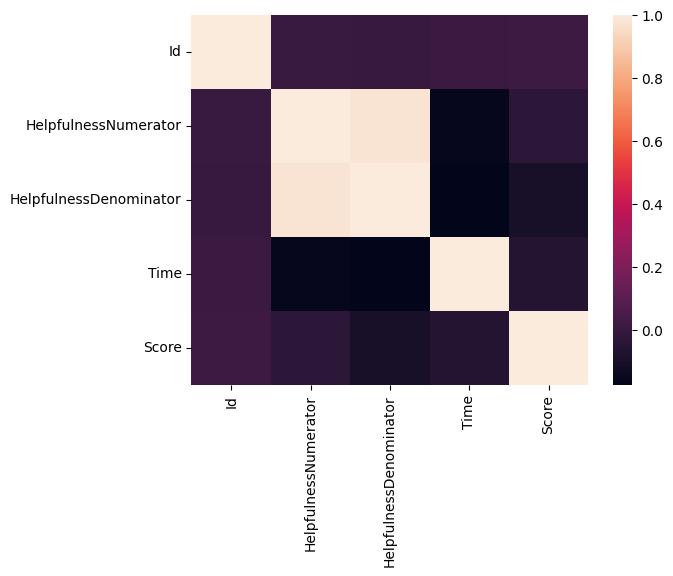

In [24]:
#Building correlation matrix
sns.heatmap(X_train.corr())

In [25]:
X_train.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,5
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,4
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,5


Filtering numerical variables and store their names in a list called numerical 

In [26]:
numerical = ['Id','HelpfulnessNumerator','HelpfulnessDenominator','Score']

Histograms Showing continious Features

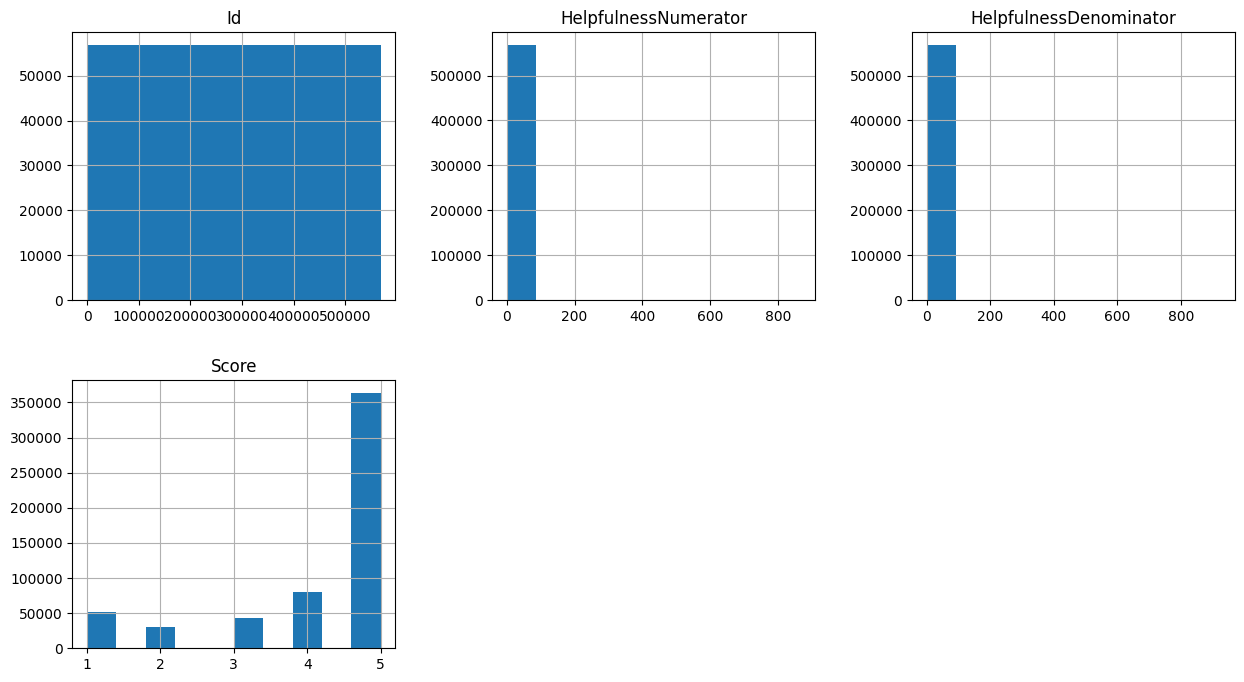

In [27]:
X_train[numerical].hist(bins=10, figsize=(15, 8),layout=(2,3));

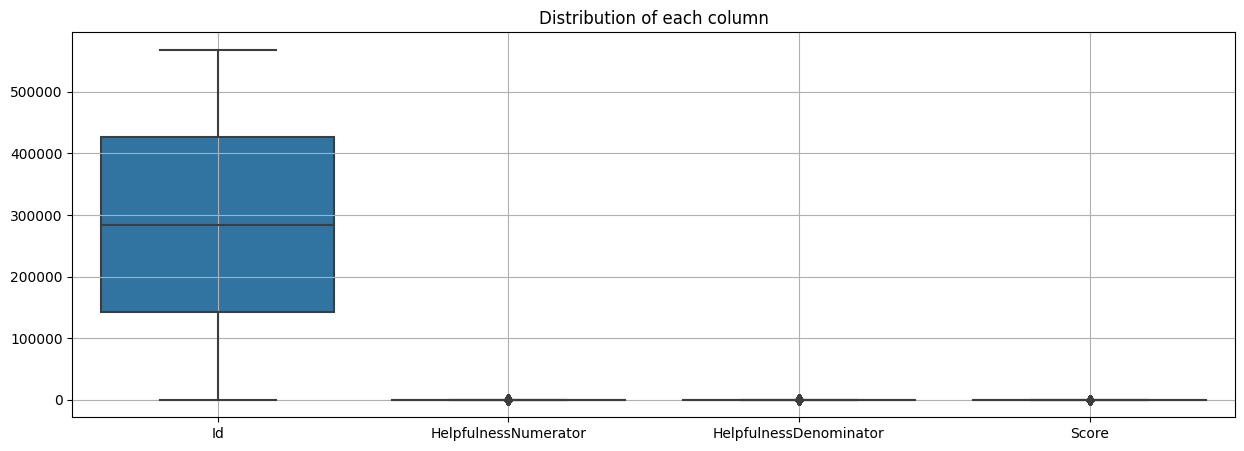

In [28]:
#General Visualization
#Let's take a look at the general spread of the data in each column of our dataset.
plt.figure(dpi=100, figsize=(15, 5))
sns.boxplot(data=X_train[numerical])
plt.grid(True)
plt.title("Distribution of each column")
plt.show()

Calculating multi-collinearity of numerical features: - Using Variance Inflation Factor

In [29]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_VIF(x):
    
  vif= pd.DataFrame()
  vif['variables']=x.columns
  vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

  return(vif)

In [30]:
x=X_train[numerical]
calc_VIF(x)

,variables,VIF
0,Id,3.265056
1,HelpfulnessNumerator,21.212793
2,HelpfulnessDenominator,21.458088
3,Score,3.215998


String/Object-Type Features

In [31]:
import pandas as pd
import numpy as np
# for data cleaning
import string
import re
# for removing accented and special chracters
import unicodedata
# for stopwords Removal
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
# for calculating Polarity and Subjectivity
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
# function for making ngrams
from nltk.util import ngrams
# load in all the modules we're going to need
import nltk
import collections
# for Wordscloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

ModuleNotFoundError: No module named 'textblob'

In [ ]:
X_train['Text']

In [ ]:
X_train['Summary']

In [ ]:
# First lets remove Punctuations from the Text
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

X_train['Text'] = X_train['Text'].apply(punctuation_removal)
X_train['Summary'] = X_train['Summary'].apply(punctuation_removal)

In [ ]:
 #lets make a function to remove Numbers from the Text
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

X_train['Text'] = X_train['Text'].apply(drop_numbers)
X_train['Summary'] = X_train['Summary'].apply(drop_numbers)


In [ ]:
# lets show the Top 10 Reviews after Removal of Punctuations and Numbers
X_train['Text'].head(10)

In [ ]:
X_train['Summary'].head(10)

Data Cleaning

In [ ]:
#Remove hyperlinks and markup
def clean(raw):
    """ Remove hyperlinks and markup """
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

In [ ]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.stem import PorterStemmer
stop=set(stopwords.words("english"))
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()
#Removing stopwords
def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

In [ ]:
#Stemming and Lematizing
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
def Stemming(text):
   stem=[]
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

In [ ]:
#clean and remove emoji
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [ ]:
#clean unnecessary whitespaces
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

In [ ]:
#clean and remove symbols
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string  

In [ ]:
def cleaning(df,review):
    df[review] = df[review].apply(clean)
    df[review] = df[review].apply(deEmojify)
    df[review] = df[review].str.lower()
    df[review] = df[review].apply(remove_symbols)
    df[review] = df[review].apply(remove_stopword)
    df[review] = df[review].apply(unify_whitespaces)
    df[review] = df[review].apply(Stemming)

In [ ]:
cleaning(X_train,'Text')
cleaning(X_train,'Summary')

Analysis and Visualization:-Text and Summary

Wordclouds For all Text and Summary

In [ ]:
txt = ' '.join(rev for rev in X_train.Text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
txt = ' '.join(rev for rev in X_train.Summary)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
X_train[['Text','Summary']].head()

In [ ]:
X_train.head()

Split data into Traning and Testing sets

In [ ]:
# random split train and test 
index = X_train.index
X_train['random_number'] = np.random.randn(len(index))
train = X_train[X_train['random_number'] <= 0.8]
test = X_train[X_train['random_number'] > 0.8]

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

In [ ]:
X_train1 = train_matrix
X_test = test_matrix
y_train = train['Score']
y_test = test['Score']

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(X_train1,y_train)

In [ ]:
# Model Prediction

predictions = lr.predict(X_test)
predictions

Model Evaluation


ROC, AUC, Confusion Matrix and Accuracy are widely used for evaluating Logistic Regression model.


All of these metrics are based on calculating the difference between the y values predicted by the model and the actual y values of the test set, hence y_pred and y_test. There are four possible scenarios while comparing the differences:

    
True Positive: survived when predicted survived
    

True Negative: Didn't survive when predicted Didn't survive
    

False Positive: Didn;t survive when predicted survived
    

False Negative:Survived when predicted Didn't survive

Confusion Matrix

In [ ]:
from sklearn import metrics
#confusion matrix
confusion_matrix=metrics.plot_confusion_matrix(lr,X_test,y_test, cmap="GnBu")
confusion_matrix

In [ ]:
#Accuracy calculates the ratio of all correct predictions
print("Accuracy:",metrics.accuracy_score(y_test,predictions))

URL

In [ ]:
#https://www.kaggle.com/code/danielbeltsazar/amazon-review-sentiment-analysis/notebook
#https://www.kaggle.com/code/tookiprotvic/netflix-visualizations-recommendation-eda/edit
#https://www.kaggle.com/code/mohamedbakrey/eda-for-amazon-product-review-sentiment-analysis
#https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/
#https://medium.com/jovianml/exploratory-data-analysis-using-python-a-case-study-78aa34e5922e
